# Part 1: EDA

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('D:/ESAA/21-1/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Survived: 생존여부 / 0 = No, 1 = Yes
- Pclass: 티켓의 선실 등급 / 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: 나이
- Sex: 성별
- Age: 나이
- SibSp: 같이 탑승한 형제, 자매, 배우자의 수
- ParCh: 같이 탑승한 부모, 자녀의 수	
- Ticket:티켓 번호
- Fare: 요금
- Cabin: 선실 번호
- Embarked: 탑승한 항구 / C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
data.isnull() #결측치 있는지

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum() #열별로 isnull()=True 개수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked에 결측치 존재.

### Survived; 생존한 사람의 비율

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

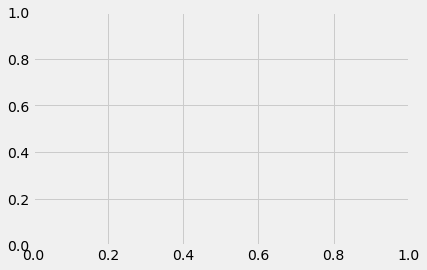

In [6]:
plt.subplots()
# tuple인데 순서대로 figure size랑 axes.
# axes는 figure(그래프) 개수만큼 존재함.
# ()안에 아무것도 안 넣으면 1개의 figure만 나옴. 

(<Figure size 1296x576 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

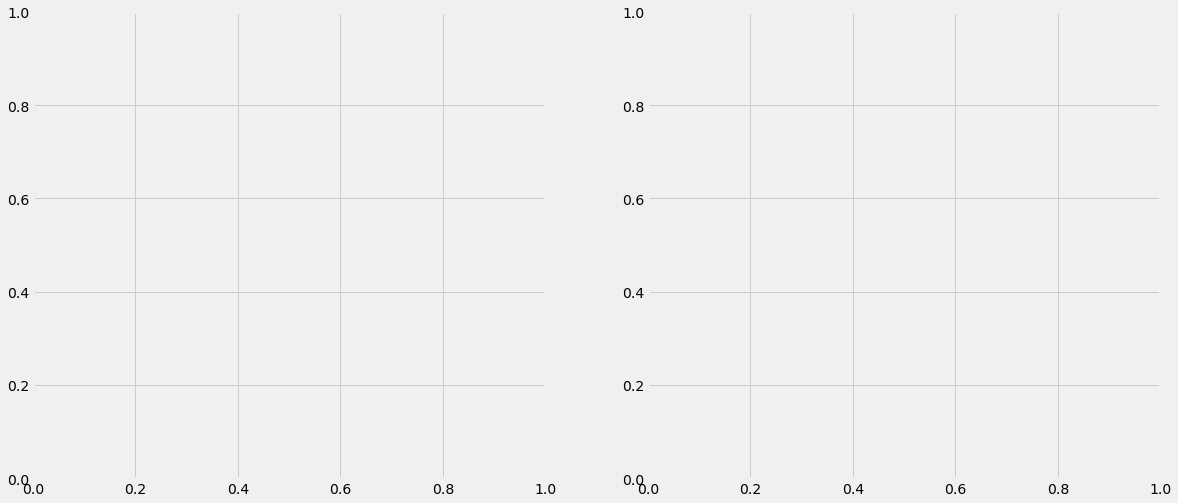

In [7]:
plt.subplots(1,2,figsize=(18,8))
# 한 행에 두개 그래프 나옴. 전체 figure size는 18x8
# axes도 두개 나옴.

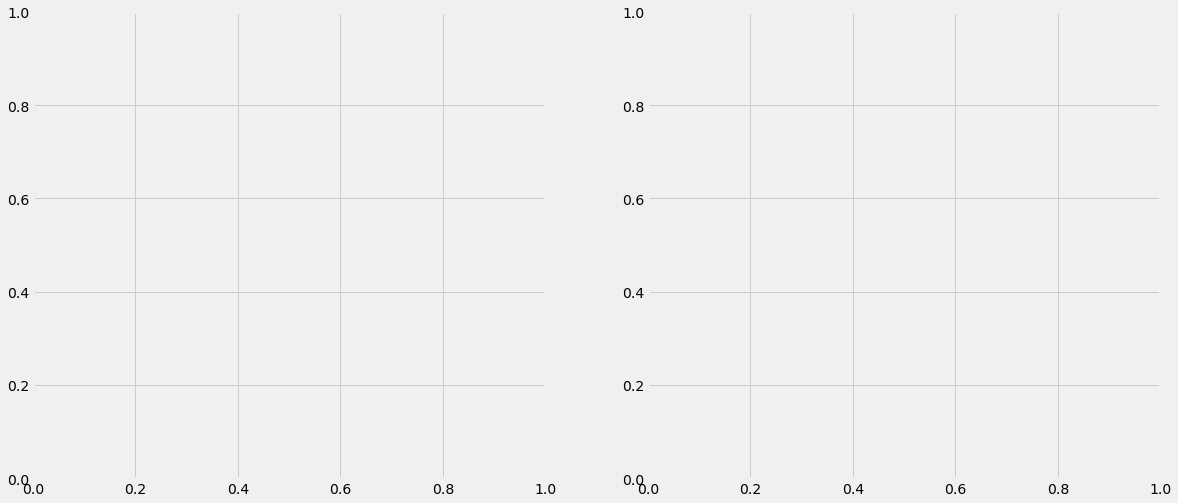

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8)) 
# f=Figure size 1296x576 with 2 Axes>
# ax=array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [9]:
data["Survived"].value_counts() 
# 죽은 사람 549, 산 사람 342

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

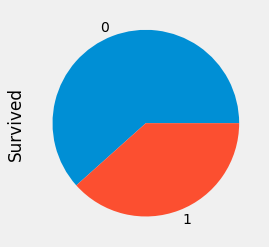

In [10]:
data["Survived"].value_counts().plot.pie()
# value_counts()의 결과로 pie plot 그림. 
# 위에서 설정해둔 plt.subplots() 중 첫번째꺼에 들어감. 

<AxesSubplot:ylabel='Survived'>

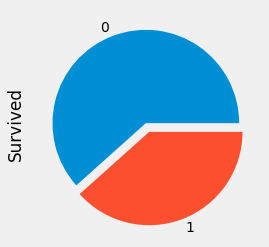

In [11]:
data["Survived"].value_counts().plot.pie(explode=[0,0.1])
# explode: 0과 1에 해당하는 파이영역이 중심으로부터 얼마나 돌출되는지. 
# 0이면 돌출 안됨.

<AxesSubplot:ylabel='Survived'>

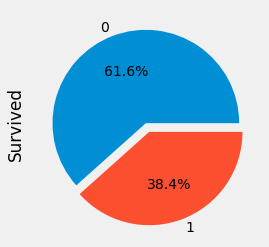

In [12]:
data["Survived"].value_counts().plot.pie(explode=[0,0.1], 
                                         autopct="%1.1f%%")
# autopct: 파이영역이 차지하는 비율 표기. 
# ( % + 소수점 몇번째 자리까지 표시할지 + f + % ) % 꼴

<AxesSubplot:ylabel='Survived'>

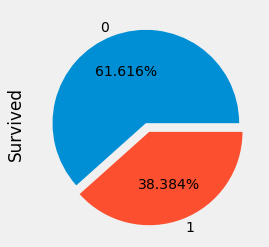

In [13]:
data["Survived"].value_counts().plot.pie(explode=[0,0.1], 
                                         autopct="%.3f%%")

<AxesSubplot:ylabel='Survived'>

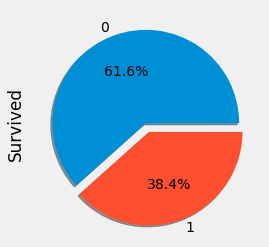

In [14]:
data["Survived"].value_counts().plot.pie(explode=[0,0.1], 
                                         autopct="%1.1f%%",
                                         shadow=True)
# shadow=True: 파이영역 아래 그림자 생김.

In [15]:
data["Survived"].value_counts().plot.pie(explode=[0,0.1], 
                                         autopct="%1.1f%%",
                                         shadow=True,
                                         ax=ax[0])
# ax 중 첫번째 위치에 그려지도록 함.

<AxesSubplot:ylabel='Survived'>

In [16]:
ax[0].set_title("Survived") #첫번째 그래프의 제목
ax[0].set_ylabel("") #첫번째 그래프의 y축 변수 이름 안넣음

Text(3.200000000000003, 0.5, '')

<AxesSubplot:xlabel='Survived', ylabel='count'>

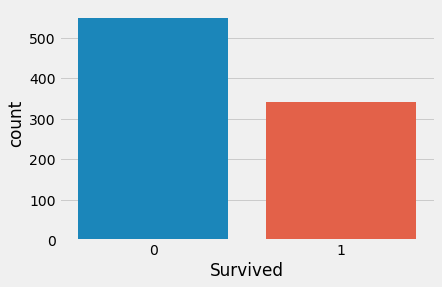

In [17]:
sns.countplot("Survived", data=data)
# survived 변수의 값 별로 count plot. 

In [18]:
sns.countplot("Survived", data=data, ax=ax[1]) # 두번째 위치에 그림. 
ax[1].set_title("Survived")

Text(0.5, 1.0, 'Survived')

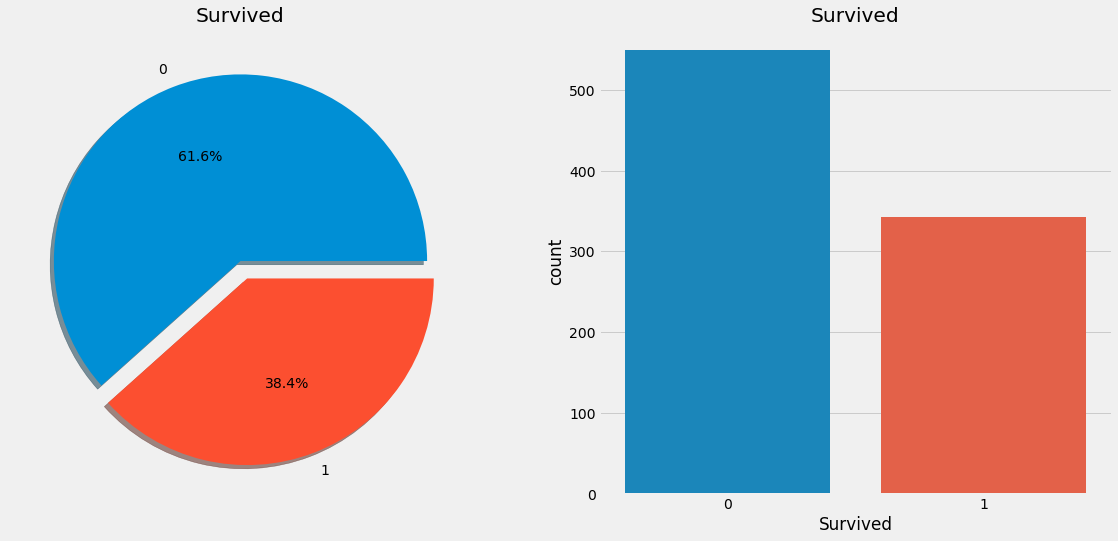

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8)) 

data["Survived"].value_counts().plot.pie(explode=[0,0.1], 
                                         autopct="%1.1f%%",
                                         shadow=True,
                                         ax=ax[0])
ax[0].set_title("Survived")
ax[0].set_ylabel("") 

sns.countplot("Survived", data=data, ax=ax[1]) 
ax[1].set_title("Survived")

plt.show()

전체 탑승자의 38.4%만 생존. 

### Sex; 성별 별 생존율

In [20]:
data.groupby(["Sex","Survived"])["Survived"].count()
# 성별마다 Survived 값의 개수

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [21]:
data[["Sex","Survived"]].groupby(["Sex"]).mean()
# Sex별로 Survived 값의 평균 => 생존율

,Survived
Sex,
female,0.742038
male,0.188908


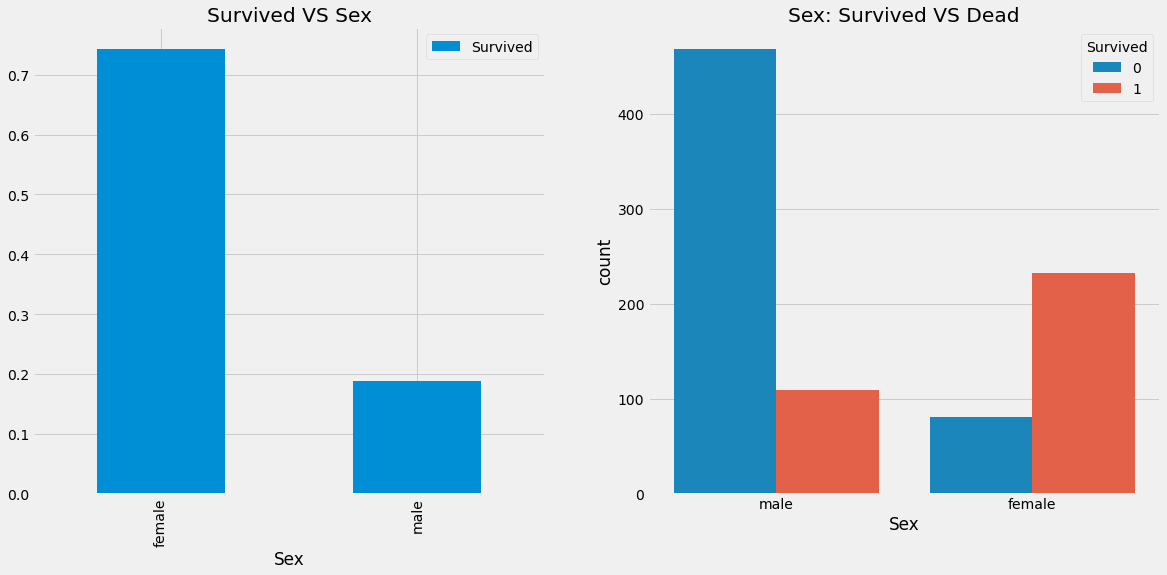

In [22]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0]) 
#첫번째 위치에 성별 별 생존율 bar plot 그림.
ax[0].set_title("Survived VS Sex")

sns.countplot("Sex", hue="Survived", data=data, ax=ax[1])
#두번째 위치에 성별 별 count plot 그리는데 각각 Survived 값마다 색깔 다르게 그림.
ax[1].set_title("Sex: Survived VS Dead")

plt.show()

- 여자가 남자보다 생존 확률이 높음.
- 탑승자 수로 보면 남자가 여자보다 많지만 생존한 사람은 여자가 더 많고 비율도 여자가 더 높음.

### Pclass; 선실 등급 별 생존율

In [23]:
pd.crosstab(data.Pclass, data.Survived)
# crosstab: frequency table 
# 행: Pclass / 열: Survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [24]:
pd.crosstab(data.Pclass, data.Survived, margins=True) 
# margins=True: 행, 열별로 합도 나타냄.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient()
# style.backgroud_gradient(): 수치의 크기를 색상으로 나타냄. 어두울수록 큰 값.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [26]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap="summer_r")
# cmap: 색깔

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


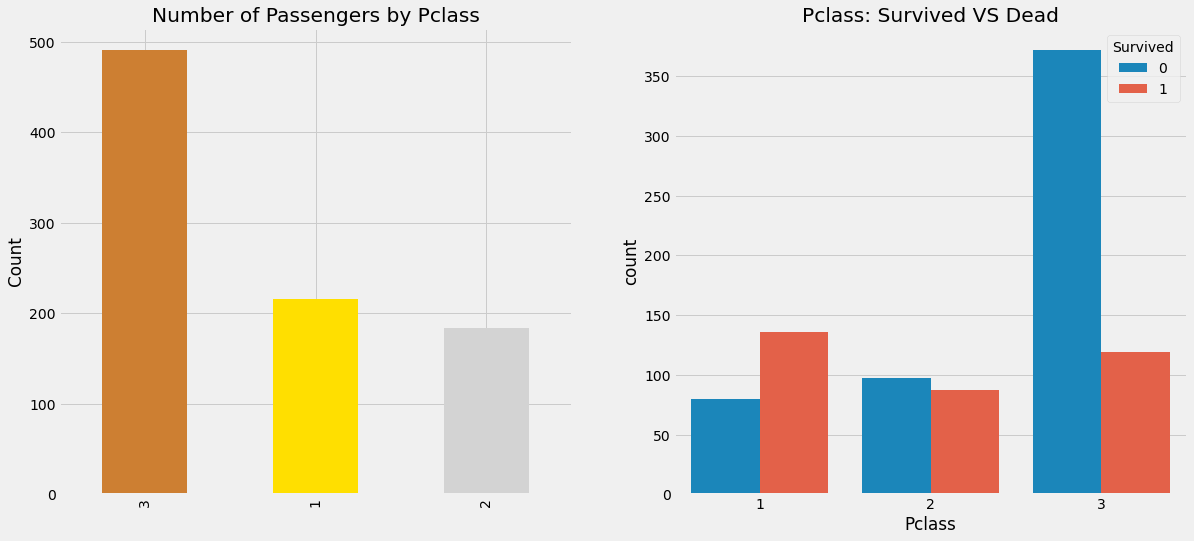

In [27]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data["Pclass"].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
#막대 순서대로 색깔 다르게함.
ax[0].set_title("Number of Passengers by Pclass")
ax[0].set_ylabel("Count")

sns.countplot("Pclass", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Pclass: Survived VS Dead")

plt.show()

- 3등급에 탄 사람이 제일 많음.
- 살아남은 사람은 1등급이 제일 많고 3등급이 제일 적음.

### Sex+Pclass; 성별과 객실등급 별 생존율

In [28]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True)
# 가로축은 우선 Sex로 나뉜 후 각각 Survived로 나뉨. 
# 세로축은 Pclass로 나뉨. 

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

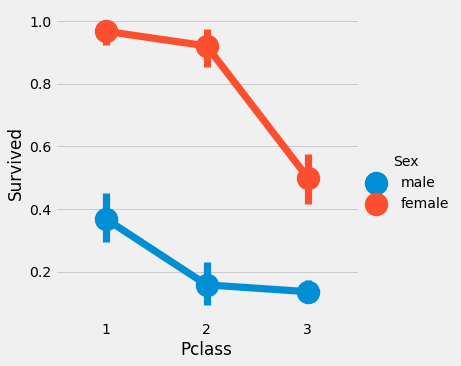

In [29]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=data)
#factorplot: x축 값 별로 y축 값의 평균 꺾은선 그래프
plt.show()

# ↪질문: 저 세로선은 뭐임??

- 각 Pclass 별로 여성의 생존율이 더 높음.
- 각 성별 내에서 생존율은 1등급>2등급>3등금 순서.

# Age; 나이 별 생존율

In [30]:
print("The Oldest Passenger was:", data["Age"].max(), "years old")
print("The Youngest Passenger was:", data["Age"].min(), "years old")
print("Average Age of the Passengers was:", data["Age"].mean(), "years old")

The Oldest Passenger was: 80.0 years old
The Youngest Passenger was: 0.42 years old
Average Age of the Passengers was: 29.69911764705882 years old


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

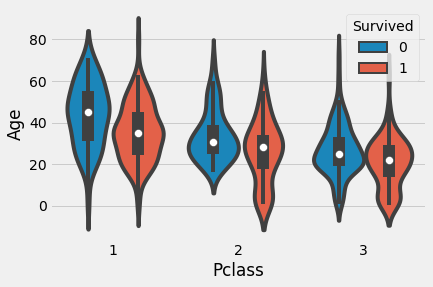

In [31]:
sns.violinplot("Pclass", "Age", hue="Survived", data=data)
# Pclass 별로 생존 여부에 따른 나이 분포. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

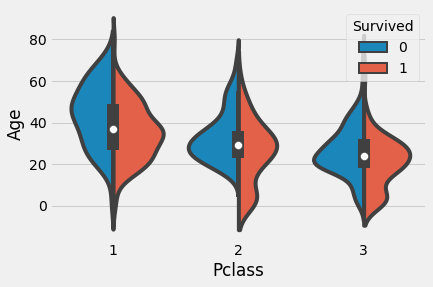

In [32]:
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True)
# split=True: Pclass별로 하나의 violin plot을 사용.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

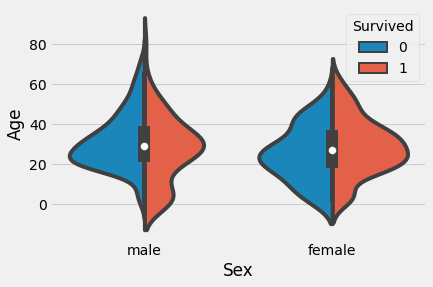

In [33]:
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True)
# 성별 별로 생존 여부에 따른 나이 분포.

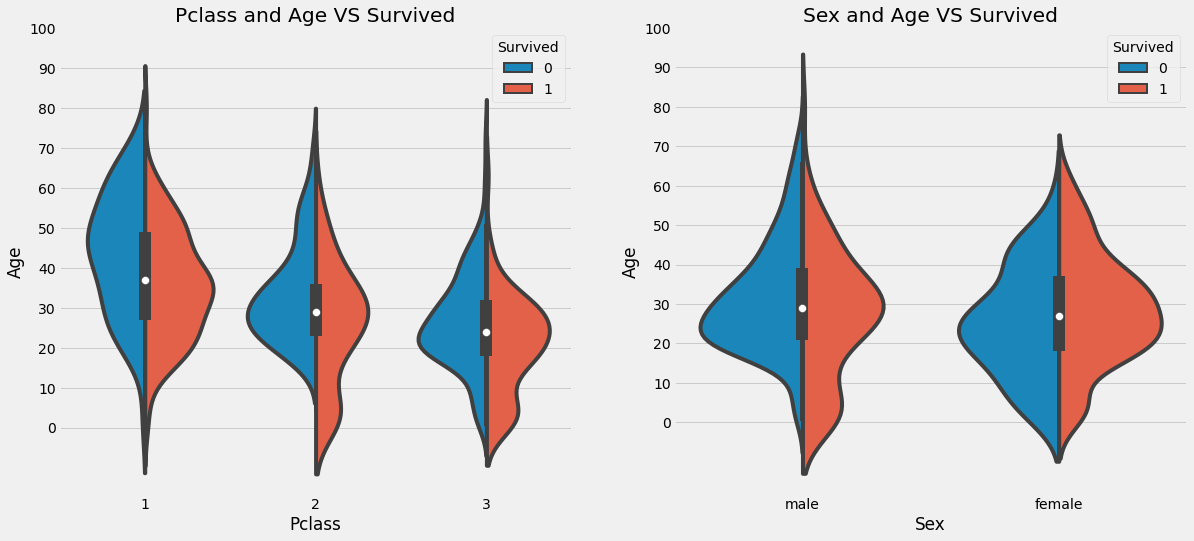

In [34]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age VS Survived")
ax[0].set_yticks(range(0,110,10)) 
# y축 범위를 0부터 110까지 10단위로.

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age VS Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

- 객실 등급 높을수록 나이대가 높음.
- 같은 객실 내에서 10살 이하는 생존율이 높음. 
- 남성은 10-40살에서 사망률이 높음.

# Age 결측치 처리
Name 변수의 맨 앞에 오는 Mr, Ms, Mrs 이용.

In [35]:
data["Initial"]=0
for i in data:
    data["Initial"]=data.Name.str.extract("([A-Za-z]+)\.")
# ()속의 정규표현식을 만족하는 문자열만 추출해서 Initial 변수에 저장. 없으면 결측치.

- (x): 그룹
- [xy]: x나 y 중 하나 선택
- [x-y]: x~y 사이의 문자
- [a-zA-Z]: 모든 알파벳
- x+: x가 한번 이상 반복됨

__([A-Za-z]+): 하나 이상의 알파벳__

- x.: x 뒤에 모든 문자가 오는 것을 의미함. 즉 x 앞엔 아무것도 없어야함. 
- \: \ 뒤에 오는 애가 문자가 아닌 경우(점이나 괄호 등) 걔를 문자로 인식하게 해줌.

__([A-Za-z]+)\.: 하나 이상의 알파벳 뒤에 점이 오는 경우__

In [36]:
data["Initial"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

# ↪질문: 왜 .은 포함이 안됨?

In [37]:
pd.crosstab(data.Initial, data.Sex).T
# .T 해주면 Transpose

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [38]:
data[data.Initial=="Dr"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr


- Mlle, Mme는 Miss 잘못 쓴듯 -> Miss 포함해서 모두 Ms로 변경.
- 나이든 여자만 해당되는 애들은 모두 Mrs로 통일; Countess, Lady
- 나이든 남자만 해당되는 애들은 모두 Mr로 통일; Capt, Don, Dr, Major, Sir
- 어른 남자는 그대로 Master
- 그 외는 모두 Other로 처리; Col, Jonkheer, Rev
# 질문: Dr은 여자도 한명 있는데 그냥 남자로 봐도 무방할까

In [39]:
data["Initial"].replace(["Mlle","Mme","Miss","Ms",
                         "Countess","Lady","Mrs",
                        "Capt","Don","Dr","Major","Sir","Mr",
                         "Master",
                        "Col","Jonkheer","Rev"],
                       ["Ms","Ms","Ms","Ms",
                        "Mrs","Mrs","Mrs",
                        "Mr","Mr","Mr","Mr","Mr","Mr",
                        "Master",
                        "Other","Other","Other"], inplace=True)

In [40]:
data.groupby("Initial")["Age"].mean()
# 각 initial 별로 age의 평균.

Initial
Master     4.574167
Mr        32.739609
Mrs       35.981818
Ms        21.860000
Other     45.888889
Name: Age, dtype: float64

In [41]:
data.loc[(data.Age.isnull())&(data.Initial=="Master"), "Age"] = 5
data.loc[(data.Age.isnull())&(data.Initial=="Mr"), "Age"] = 33
data.loc[(data.Age.isnull())&(data.Initial=="Mrs"), "Age"] = 36
data.loc[(data.Age.isnull())&(data.Initial=="Ms"), "Age"] = 22
data.loc[(data.Age.isnull())&(data.Initial=="Other"), "Age"] = 46

In [42]:
data.Age.isnull().sum()

0

# Age; 생존에 따른 나이 분포

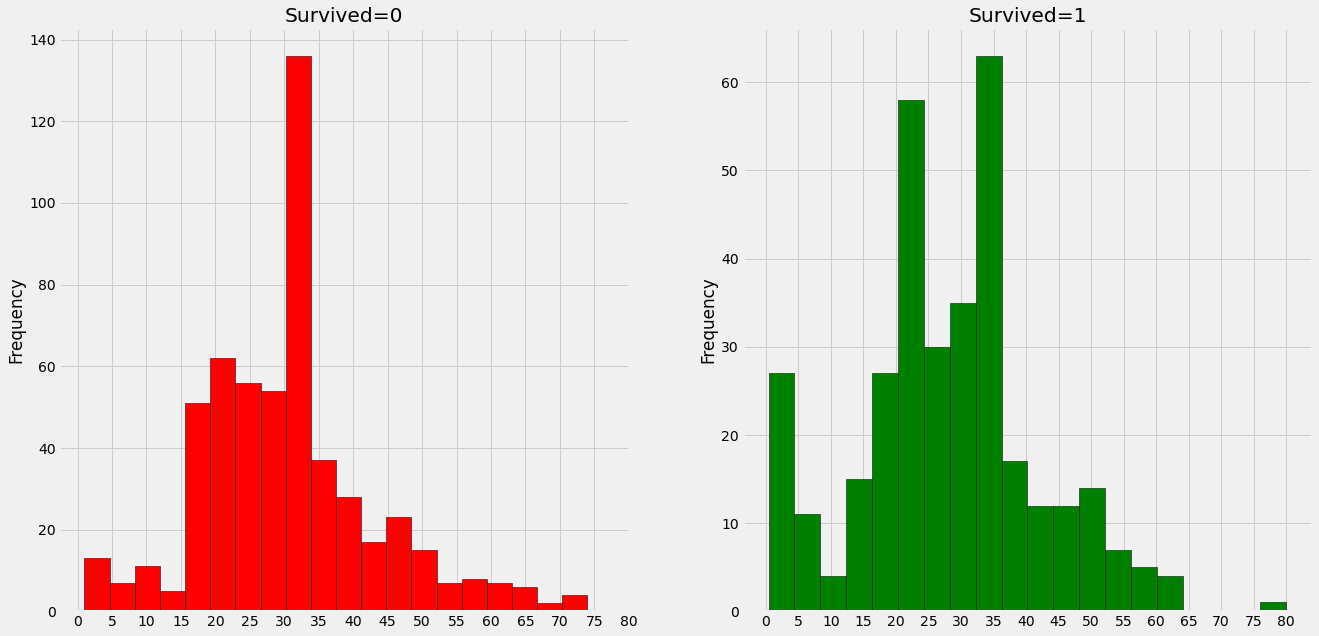

In [43]:
f, ax = plt.subplots(1,2, figsize=(20,10))

data[data.Survived==0].Age.plot.hist(bins=20, 
                                     edgecolor="black",
                                     color="red",
                                     ax=ax[0])
ax[0].set_title("Survived=0")
ax[0].set_xticks(range(0,85,5))

data[data.Survived==1].Age.plot.hist(bins=20,
                                    edgecolor="black",
                                    color="green",
                                    ax=ax[1])
ax[1].set_title("Survived=1")
ax[1].set_xticks(range(0,85,5))

plt.show()

- 5살 이하는 많이 생존.
- 가장 나이 많은 탑승자는 생존.
- 30-35살이 가장 많이 죽음.

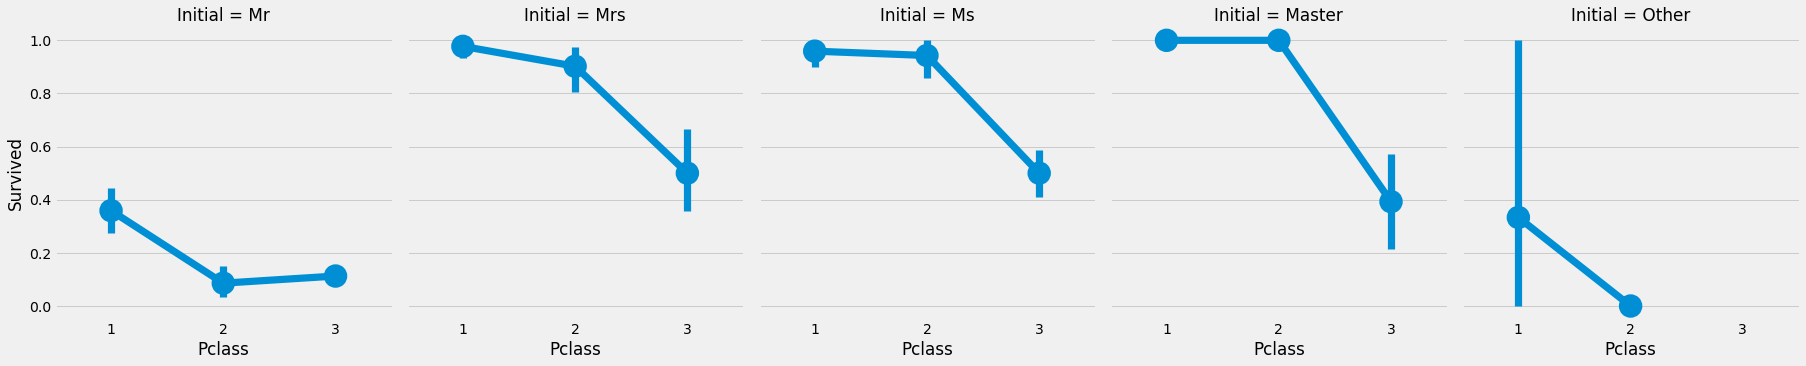

In [44]:
sns.factorplot("Pclass", "Survived", col="Initial", data=data) 
plt.show()
# initial별로 Pclass별 생존율.

- Mr의 생존율이 가장 낮음. 
- Mrs, Ms, Master의 생존율이 전반적으로 높음. 특히 등급 높을수록.
- Other은 글쎄,,

ValueError: Invalid RGBA argument: 0.5450980392156862

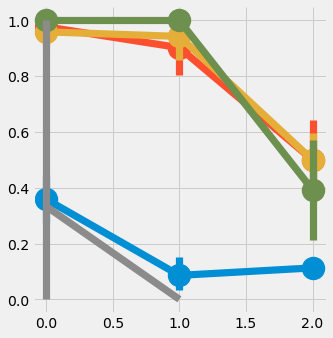

In [45]:
sns.factorplot("Pclass", "Survived", hue="Initial", data=data)
plt.show()

아마도 initial의 카테고리가 넘 많아서,,? 다 못 그린다고 에러 뜨는듯

# Embarked

In [46]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True)
# 탑승한곳 별 선실등급 / 성별 별 생존여부

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

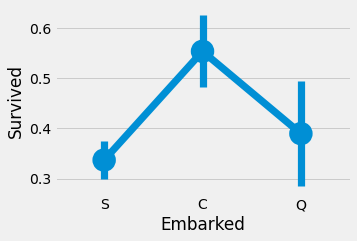

In [47]:
sns.factorplot("Embarked","Survived",data=data)
fig = plt.gcf() #현재 figure을 받음
fig.set_size_inches(5,3) 
plt.show()

- C에서 탄 사람들의 생존율이 가장 높고 S에서 탄 사람들의 생존율이 가장 낮음.

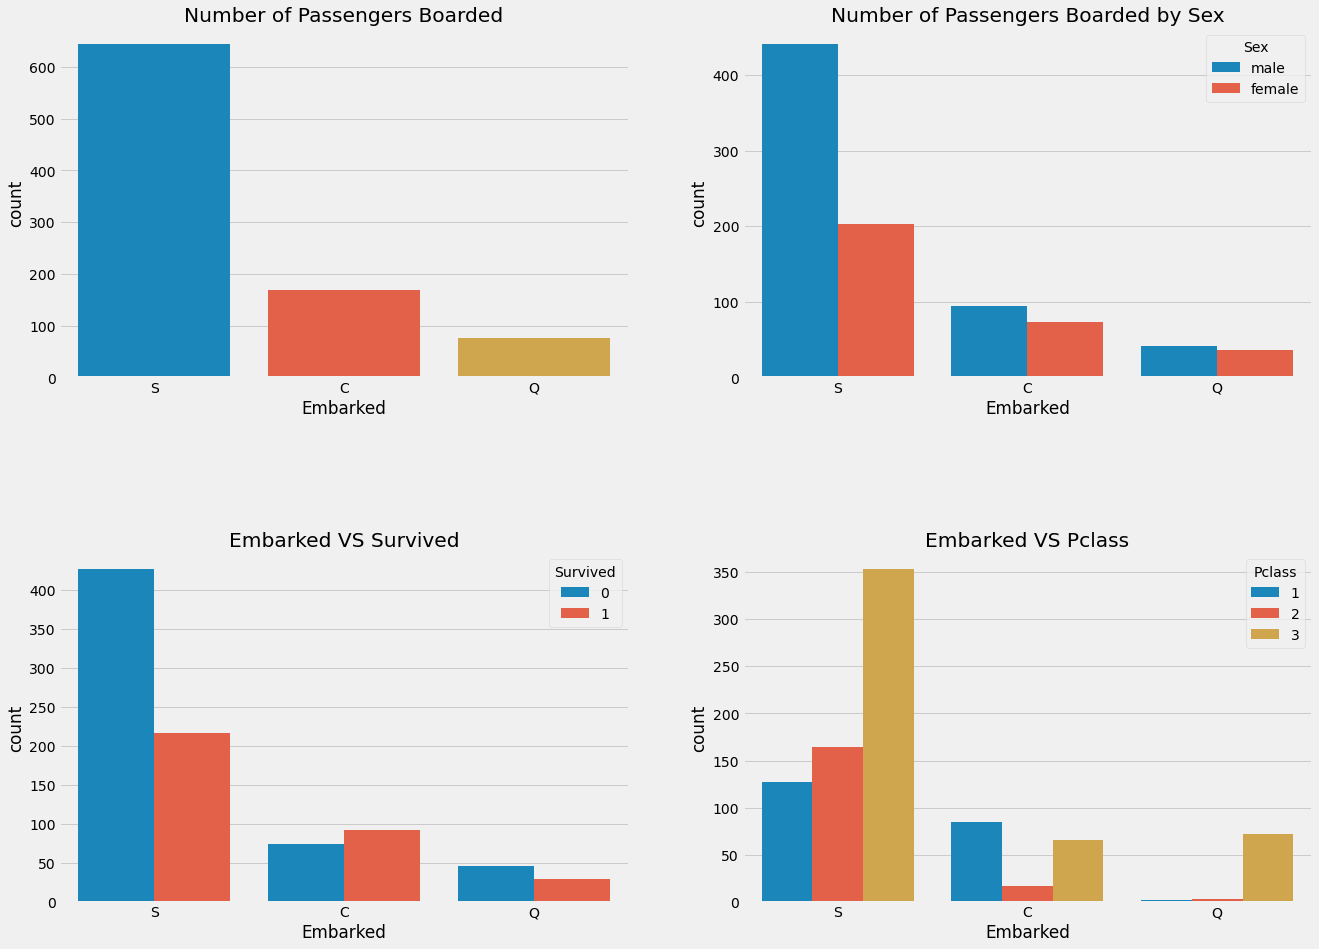

In [48]:
f,ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot("Embarked", data=data, ax=ax[0,0])
ax[0,0].set_title("Number of Passengers Boarded")

sns.countplot("Embarked", hue="Sex", data=data, ax=ax[0,1])
ax[0,1].set_title("Number of Passengers Boarded by Sex")

sns.countplot("Embarked", hue="Survived", data=data, ax=ax[1,0])
ax[1,0].set_title("Embarked VS Survived")

sns.countplot("Embarked", hue="Pclass", data=data, ax=ax[1,1])
ax[1,1].set_title("Embarked VS Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
#wspace: plot 간 가로 간격. 0.2 x plot가로축길이
#hspace: plot 간 세로 간격. 0.5 x plot세로축길이
plt.show()

- 사람들 많이 탄 순서: S>C>Q
- 성별 차이 많이 나는 순서: S>C>Q - 전반적으로 남자가 더 많이 탐.
- 제일 많이 살아남은건 S>C>Q 순서지만 비율로 보면 C는 반 이상이 살아남음. 

- 위에서 Pclass 높을수록 생존율 높았음 => Pclass=1이 제일 많은 S가 가장 많이 살아남았지만 1에비해 2,3이 월등히 더 많기 때문에 생존율은 높진 않음. 
- 반면 C는 PClass1이 2,3에 비해 그래도 더 많기 때문에 생존율이 높은 편.
- Q는 3이 월등히 많아서 생존율 낮은듯? 그래도 비율상 S에 비해 여자가 많아서 S에 비해 생존율 자체는 높은듯?

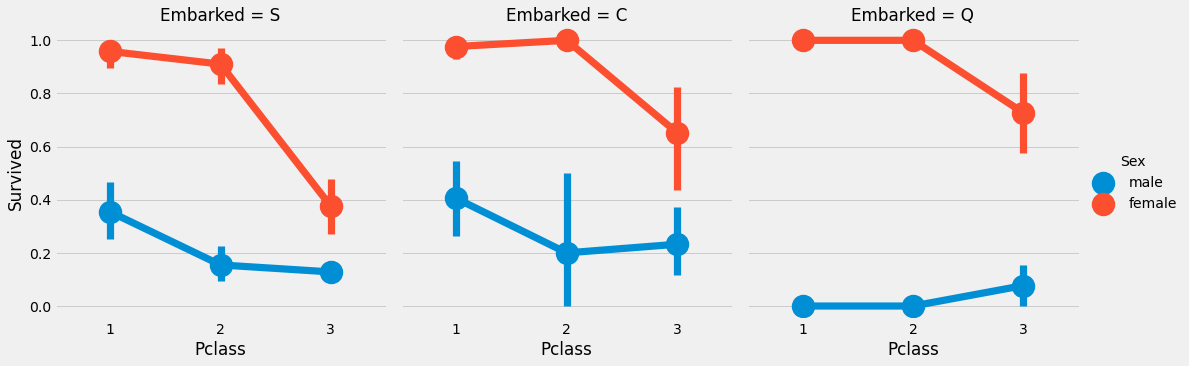

In [49]:
sns.factorplot("Pclass", "Survived", hue="Sex", col="Embarked", data=data)
plt.show()

- 여성이 남성에 비해 생존율 높고, Pclass 높을수록 생존율 높음.
- 여성 중에선 S에서 탄 Pclass 3이 가장 생존율 낮고
- 남성 중에선 !에서 탄 경우가 가장 생존율 낮음.

In [50]:
data["Embarked"].fillna("S", inplace=True)
# S에서 탄 사람들이 가장 많아서 그냥 S로 채움.

In [51]:
data.Embarked.isnull().sum()

0

# SibSp; 형제자매, 배우자에 따른 생존율

In [52]:
pd.crosstab(data.SibSp, data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


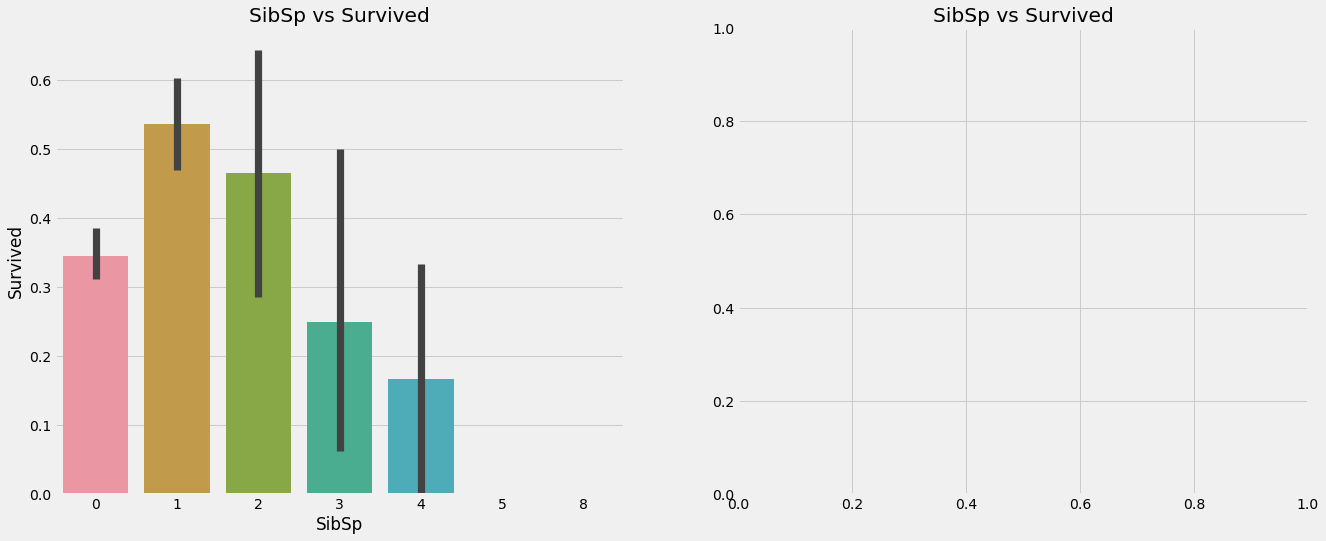

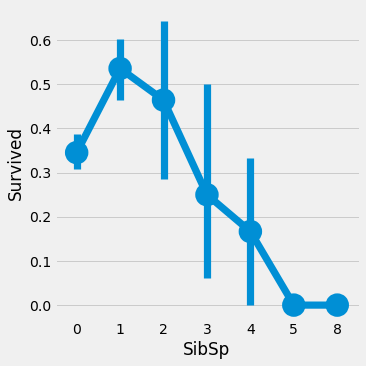

In [53]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

#plt.close(2)
plt.show()

# ↪질문: close(2) 안하면 왜 세개 뜨는거?

- 형제자매나 배우자가 한명 있을때 생존율이 가장 높고 많아질수록 감소.

In [54]:
pd.crosstab(data.SibSp, data.Pclass, margins=True).style.background_gradient()

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


- 형제자매 없는 경우가 가장 많음. 
- 5, 8명인 경우엔 다 Pclass=3이라서 생존율 0%

# Parch: 부모, 자녀에 따른 생존율

In [55]:
pd.crosstab(data.Parch, data.Survived, margins=True).style.background_gradient()

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [56]:
pd.crosstab(data.Parch, data.Pclass, margins=True).style.background_gradient()

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


- 가족 수가 많은 경우에 Pclass-3

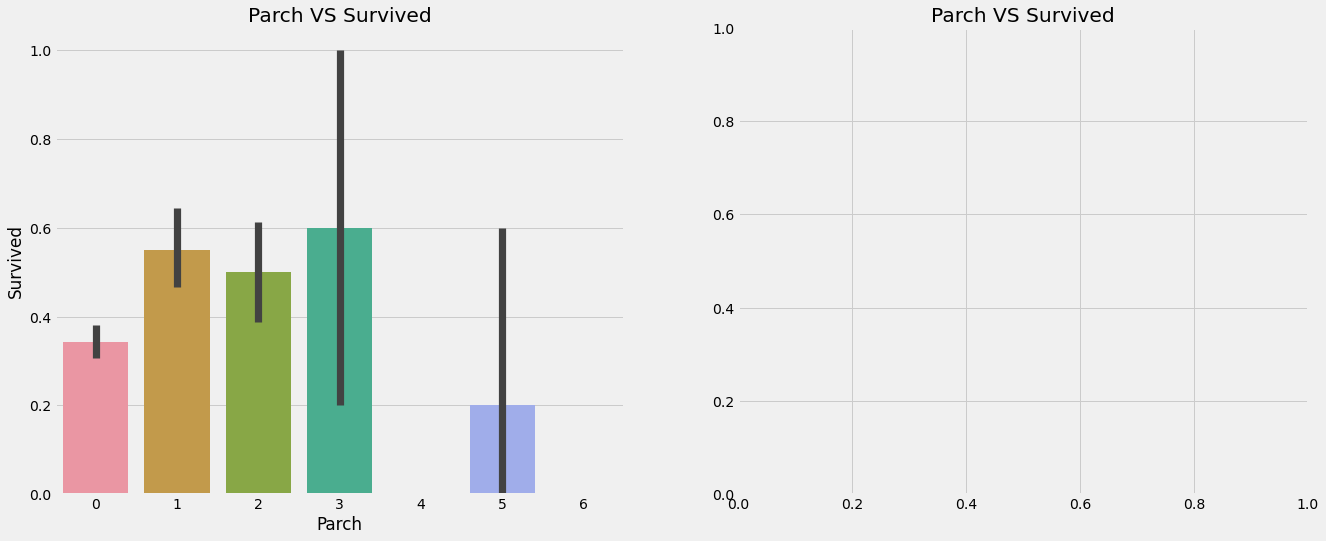

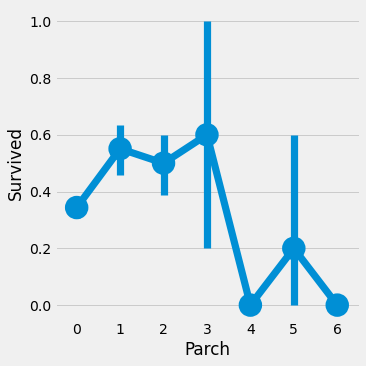

In [57]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot("Parch", "Survived", data=data, ax=ax[0])
ax[0].set_title("Parch VS Survived")

sns.factorplot("Parch", "Survived", data=data, ax=ax[1])
ax[1].set_title("Parch VS Survived")

#plt.close(2)
plt.show()

- 1,2,3명의 부모,자식이 있는 경우에 가장 생존율이 높음. 

# Fare: 운임에 따른 생존율

In [58]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [59]:
print("The Highest Fare was:", data.Fare.max())
print("The Lowest Fare was:", data.Fare.min())
print("The Average Fare was:", data.Fare.mean())

The Highest Fare was: 512.3292
The Lowest Fare was: 0.0
The Average Fare was: 32.2042079685746


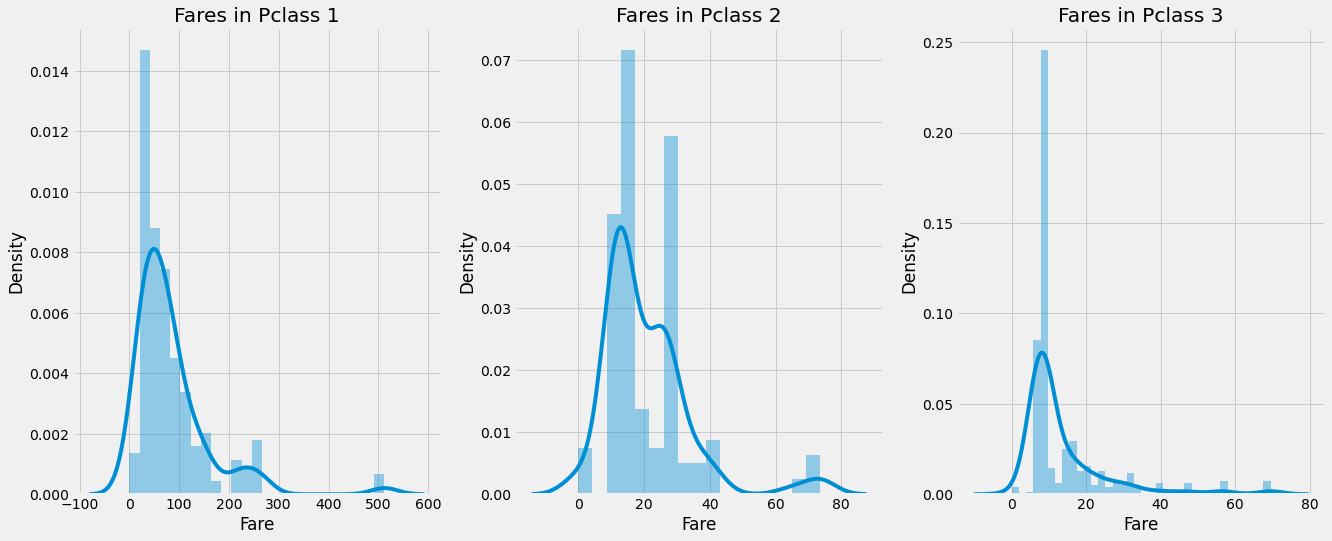

In [60]:
f, ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data["Pclass"]==1].Fare, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")

sns.distplot(data[data["Pclass"]==2].Fare, ax=ax[1])
ax[1].set_title("Fares in Pclass 2")

sns.distplot(data[data["Pclass"]==3].Fare, ax=ax[2])
ax[2].set_title("Fares in Pclass 3")

plt.show()

- Pclass=1은 단위가 다름!!
- PClass=2, 3은 10-20 정도에 모여있음.

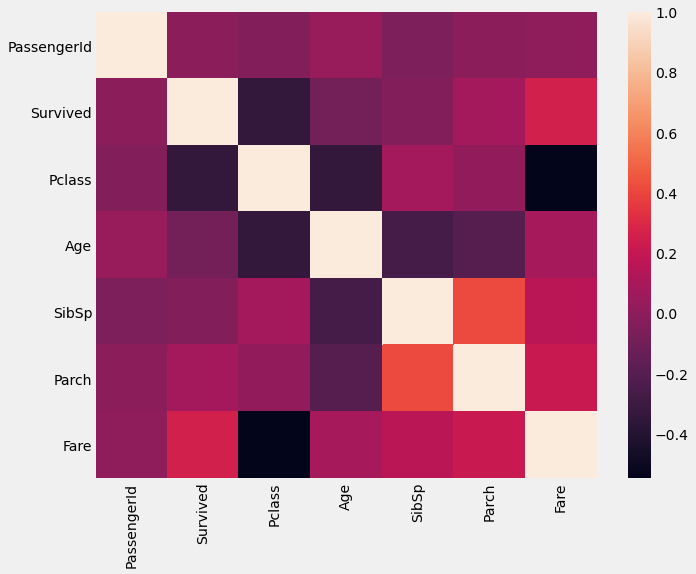

In [61]:
sns.heatmap(data.corr()) 
fig=plt.gcf() #figure을 fig에 저장
fig.set_size_inches(10,8)
plt.show()

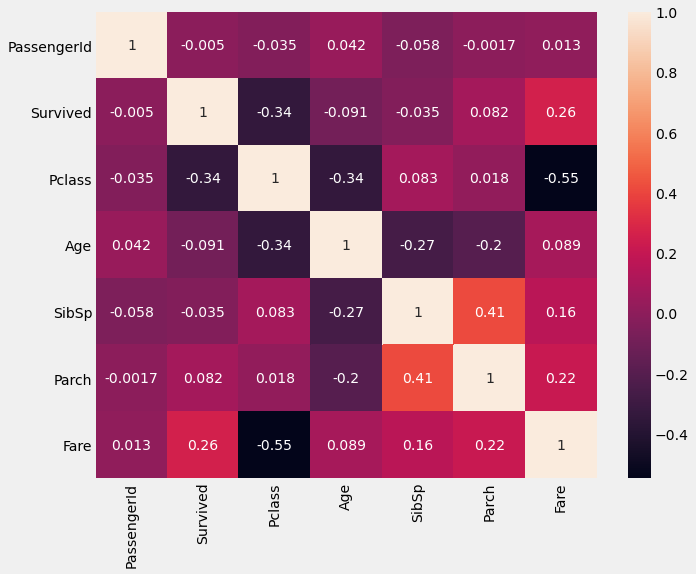

In [62]:
sns.heatmap(data.corr(), annot=True) 
fig=plt.gcf() 
fig.set_size_inches(10,8)
plt.show()
#annot=True: 각 셀에 값 입력.

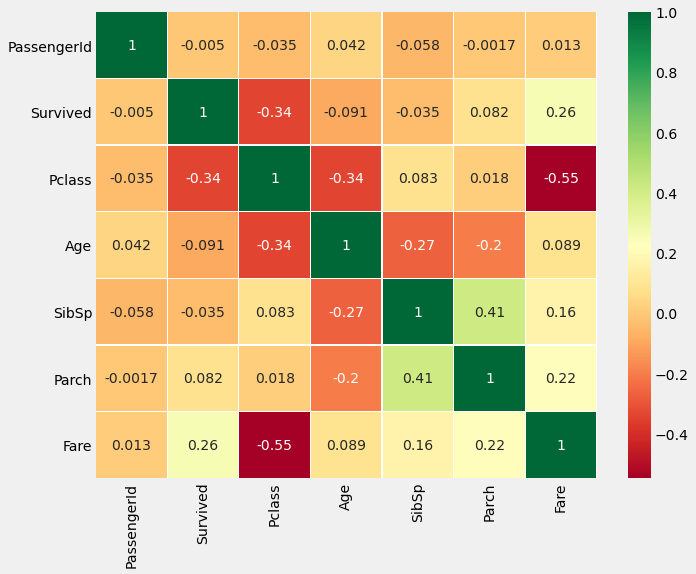

In [63]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=0.2) 
fig=plt.gcf() 
fig.set_size_inches(10,8)
plt.show()

cmap: https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

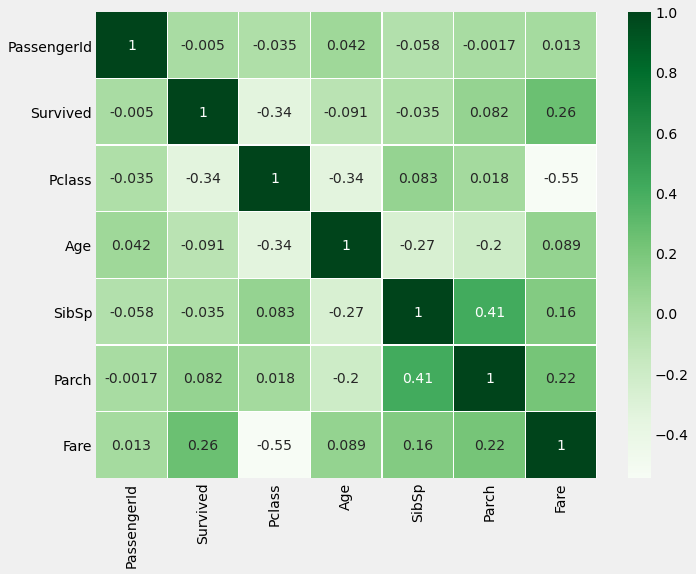

In [64]:
sns.heatmap(data.corr(), annot=True, cmap="Greens", linewidths=0.2) 
fig=plt.gcf() 
fig.set_size_inches(10,8)
plt.show()

# Part2: Feature Engineering and Data Cleaning

## Age → Age_band

In [65]:
data["Age_band"] = 0
data.loc[data["Age"]<=16, "Age_band"] = 0
data.loc[(data["Age"]>16)&(data["Age"]<=32), "Age_band"] = 1
data.loc[(data["Age"]>32)&(data["Age"]<=48), "Age_band"] = 2
data.loc[(data["Age"]>48)&(data["Age"]<=64), "Age_band"] = 3
data.loc[data["Age"]>64, "Age_band"] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


# ↪질문: 왜 굳이 16, 32, 48, 64를 기준으로 나눈건지?

In [66]:
data["Age_band"].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [67]:
data["Age_band"].value_counts().to_frame() 
#dataframe 형태로

,Age_band
1,382
2,325
0,104
3,69
4,11


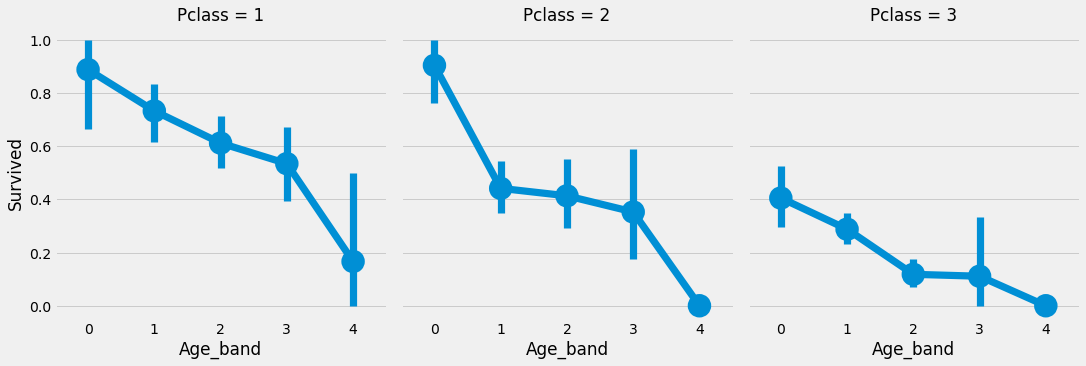

In [68]:
sns.factorplot("Age_band", "Survived", data=data, col="Pclass")
plt.show()
#Pclass 별로 Age_band별 Survived의 평균. 

- Pclass와 상관 없이 나이가 많아질수록 생존율 떨어짐.
- Pclass=3은 전체적으로 생존율이 낮음

## Parch, SibSp → Fam_Size, Alone

In [69]:
data["Fam_Size"] = 0
data["Alone"] = 0

data["Fam_Size"]=data["Parch"]+data["SibSp"]
data.loc[data["Fam_Size"]==0, "Alone"] = 1 #혼자가 아닌 경우=0

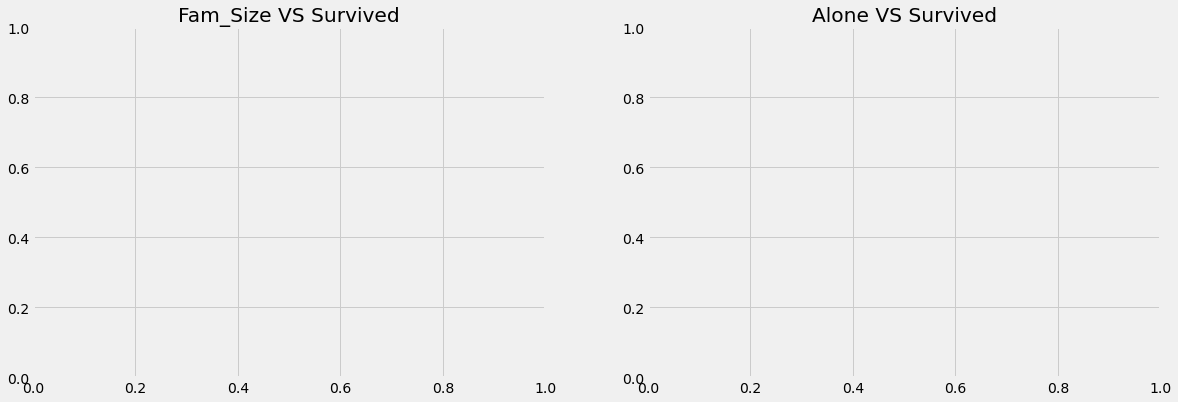

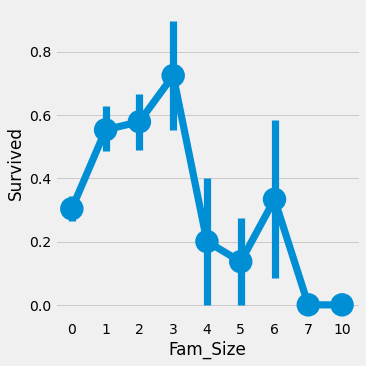

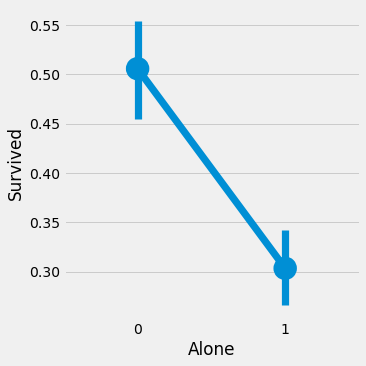

In [70]:
f, ax = plt.subplots(1,2, figsize=(18,6))
#figure 한개(fig 1) 생성

sns.factorplot(x="Fam_Size",y="Survived", data=data, ax=ax[0]) 
#sns -> figure 하나 더 생성(fig 2). BUT fig1의 ax[0]에 그리도록 명령 -> fig1의 ax[0]에 그려짐.
ax[0].set_title("Fam_Size VS Survived")

sns.factorplot(x="Alone", y="Survived", data=data, ax=ax[1]) 
#sns -> figure 하나 더 생성(fig 3). BUT fig1의 ax[1]에 그리도록 명령 -> fig1의 ax[1]에 그려짐.
ax[1].set_title("Alone VS Survived")


#plt.close(2) #비어있는 fig2 닫고
#plt.close(3) #비어있는 fig3 닫음
plt.show()

https://stackoverflow.com/questions/54959764/seaborn-factorplot-generates-extra-empty-plots-below-actual-plot

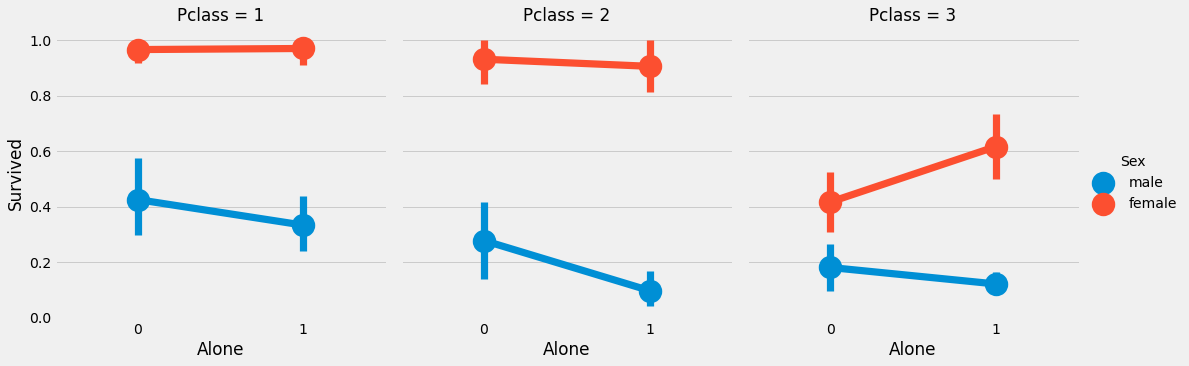

In [71]:
sns.factorplot("Alone", "Survived", data=data, hue="Sex", col="Pclass")
plt.show()

## Fare → Fare_Range, Fare_Cat

In [72]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4) #4분위수 기준으로 나눔
data["Fare_Range"]

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare_Range, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [73]:
data.groupby(["Fare_Range"])["Survived"].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [74]:
data["Fare_Cat"] = 0

data.loc[data["Fare"]<=7.91, "Fare_Cat"]=0
data.loc[(data["Fare"]>7.91)&(data["Fare"]<=14.454), "Fare_Cat"]=1
data.loc[(data["Fare"]>14.454)&(data["Fare"]<=31.0), "Fare_Cat"]=2
data.loc[(data["Fare"]>31.0)&(data["Fare"]<=512.329), "Fare_Cat"]=3

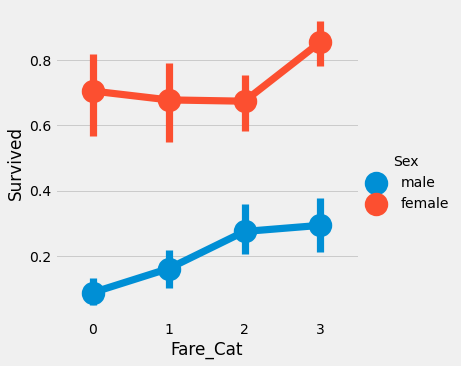

In [75]:
sns.factorplot("Fare_Cat", "Survived", data=data, hue="Sex")
plt.show()

## string → numeric

In [76]:
data["Sex"].replace(["male", "female"], [0,1], inplace=True)
data["Embarked"].replace(["S", "C", "Q"], [0,1,2], inplace=True)
data["Initial"].replace(["Mr", "Mrs", "Ms", "Master", "Other"], [0,1,2,3,4], inplace=True)

## 불필요한 변수 drop

In [77]:
data.drop(["Name","Age","Ticket","Fare","Cabin","Fare_Range","PassengerId"], axis=1, inplace=True)

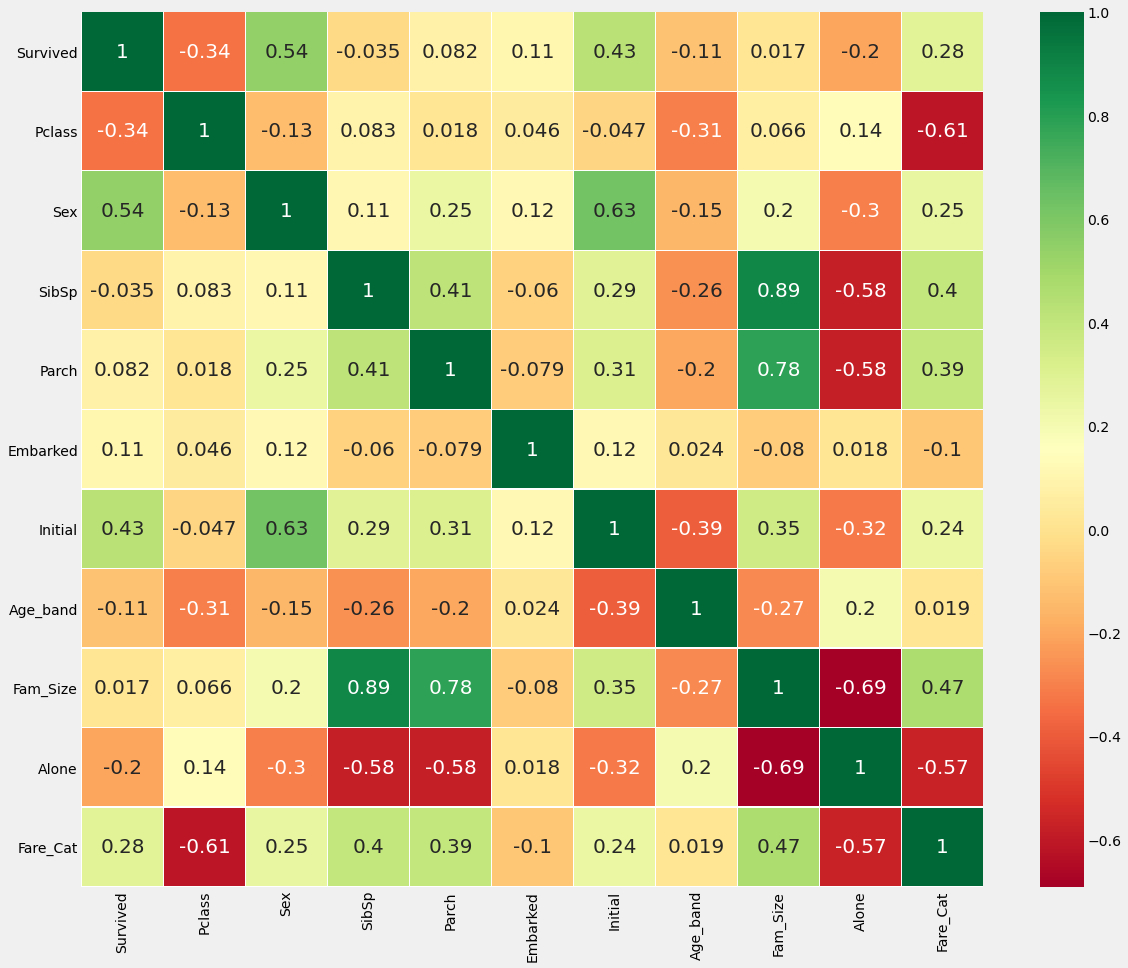

In [78]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidth=0.2, 
            annot_kws={"size":20}) #셀 내부 글자(숫자) 크기 조정

fig=plt.gcf()
#Get the current figure. If no current figure exists, a new one is created using figure().
#sns로 그린 heatmap을 fig로 받음.
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

In [79]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [80]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data["Survived"])

train_X = train[train.columns[1:]] #index=1~ 
train_y = train[train.columns[:1]] #index=~1=0

test_X = test[test.columns[1:]] #index=1~ 
test_y = test[test.columns[:1]] #index=~1=0

X=data[data.columns[1:]]
y=data["Survived"]

## 1. radial SVM (rbf-svm)

In [81]:
model = svm.SVC(kernel="rbf", C=1, gamma=0.1)

model.fit(train_X, train_y)
pred1 = model.predict(test_X)

print("Accuracy for rbf-SVM:", metrics.accuracy_score(pred1, test_y))

Accuracy for rbf-SVM: 0.835820895522388


## 2. linear SVM (linear-svm)

In [82]:
model = svm.SVC(kernel="linear", C=0.1, gamma=0.1)

model.fit(train_X, train_y)
pred2 = model.predict(test_X)

print("Accuracy for linear-SVM:", metrics.accuracy_score(pred2, test_y))

Accuracy for linear-SVM: 0.8171641791044776


## 3. logistic regression

In [83]:
model = LogisticRegression()

model.fit(train_X, train_y)
pred3 = model.predict(test_X)

print("Accuracy for Logistic Regression:", metrics.accuracy_score(pred3, test_y))

Accuracy for Logistic Regression: 0.8208955223880597


## 4. Decision Tree

In [84]:
model = DecisionTreeClassifier()

model.fit(train_X, train_y)
pred4 = model.predict(test_X)

print("Accuracy for Decision Tree:", metrics.accuracy_score(pred4, test_y))

Accuracy for Decision Tree: 0.8022388059701493


## 5. KNN

In [85]:
model = KNeighborsClassifier()

model.fit(train_X, train_y)
pred5 = model.predict(test_X)

print("Accuracy for KNN:", metrics.accuracy_score(pred5, test_y))

Accuracy for KNN: 0.8283582089552238


In [92]:
a_ind = list(range(1,11))
a=pd.Series()

for i in a_ind:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(pred, test_y)))

a

0    0.761194
0    0.794776
0    0.809701
0    0.794776
0    0.828358
0    0.817164
0    0.824627
0    0.832090
0    0.835821
0    0.832090
dtype: float64

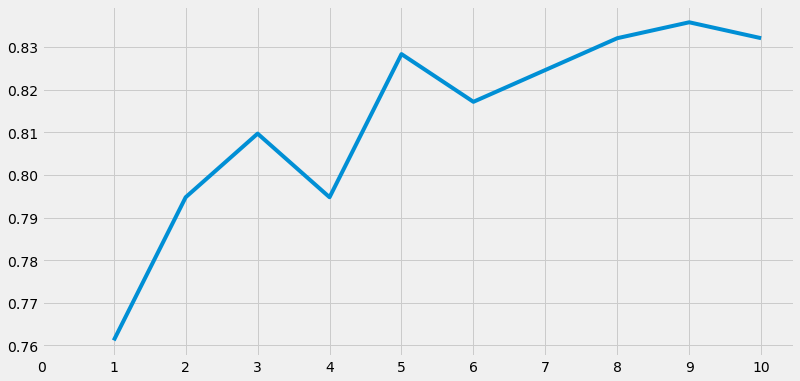

Accuracy for different values of n are: [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955]
The MAX value is: 0.835820895522388


In [96]:
plt.plot(a_ind, a)

x=list(range(0,11))
plt.xticks(x)

fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print("Accuracy for different values of n are:", a.values)
print("The MAX value is:", a.values.max())

- n=9일때 제일 정확도가 높음.

## 6. Gaussian Naive Bayes

In [97]:
model = GaussianNB()

model.fit(train_X, train_y)
pred6 = model.predict(test_X)

print("Accuracy for Naive Bayes:", metrics.accuracy_score(pred6, test_y))

Accuracy for Naive Bayes: 0.8134328358208955


## 7. Random Forest

In [98]:
model = RandomForestClassifier(n_estimators=100)

model.fit(train_X, train_y)
pred7 = model.predict(test_X)

print("Accuracy for Random Forest:", metrics.accuracy_score(pred7, test_y))

Accuracy for Random Forest: 0.8208955223880597


## CV

In [99]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=22)

In [102]:
mu=[]
acc=[]
std=[]
clf=["LinearSVM", "RadialSVM", "LogisticRegression", "KNN", "DecisionTree", "NaiveBayes","RandomForest"]
models=[svm.SVC(kernel="linear"), svm.SVC(kernel="rbf"),
       LogisticRegression(), KNeighborsClassifier(n_neighbors=9),
       DecisionTreeClassifier(), GaussianNB(),
       RandomForestClassifier(n_estimators=100)]

for m in models:
    cv_result = cross_val_score(m, X, y, cv=kfold, scoring="accuracy")
    mu.append(cv_result.mean())
    std.append(cv_result.std())
    acc.append(cv_result)

models_df = pd.DataFrame({"CV Mean": mu,
                             "Std":std},
                            index=clf)
models_df

,CV Mean,Std
LinearSVM,0.791223,0.045646
RadialSVM,0.828290,0.034427
LogisticRegression,0.803596,0.024186
KNN,0.812659,0.041477
DecisionTree,0.809251,0.028465
NaiveBayes,0.799139,0.028757
RandomForest,0.818202,0.032354


In [108]:
box=pd.DataFrame(acc, index=clf)
box

,0,1,2,3,4,5,6,7,8,9
LinearSVM,0.811111,0.831461,0.752809,0.865169,0.775281,0.797753,0.741573,0.730337,0.853933,0.752809
RadialSVM,0.822222,0.876404,0.786517,0.876404,0.808989,0.820225,0.797753,0.786517,0.876404,0.831461
LogisticRegression,0.800000,0.808989,0.775281,0.820225,0.797753,0.786517,0.786517,0.786517,0.865169,0.808989
KNN,0.733333,0.876404,0.775281,0.831461,0.831461,0.831461,0.808989,0.775281,0.865169,0.797753
DecisionTree,0.766667,0.842697,0.775281,0.831461,0.820225,0.775281,0.820225,0.786517,0.842697,0.831461
NaiveBayes,0.766667,0.764045,0.786517,0.831461,0.775281,0.831461,0.820225,0.764045,0.831461,0.820225
RandomForest,0.800000,0.831461,0.764045,0.820225,0.853933,0.820225,0.820225,0.764045,0.865169,0.842697


<AxesSubplot:>

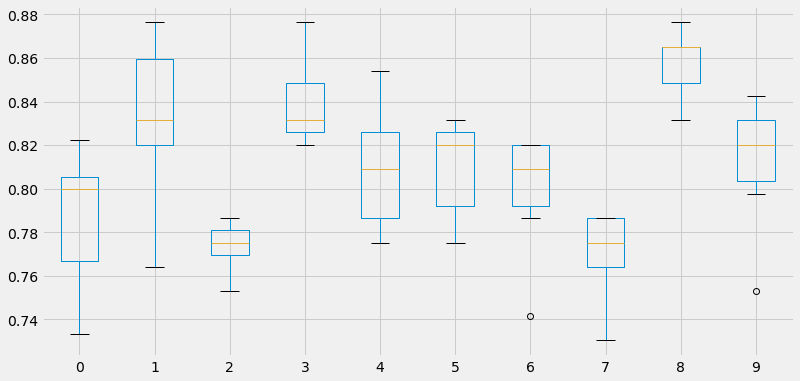

In [109]:
plt.subplots(figsize=(12,6))
box.boxplot()

<AxesSubplot:>

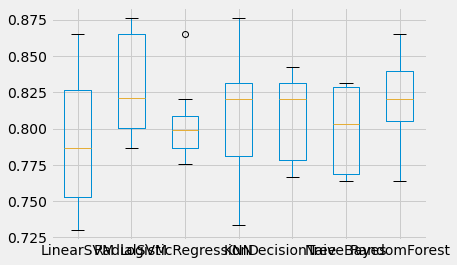

In [110]:
box.T.boxplot()

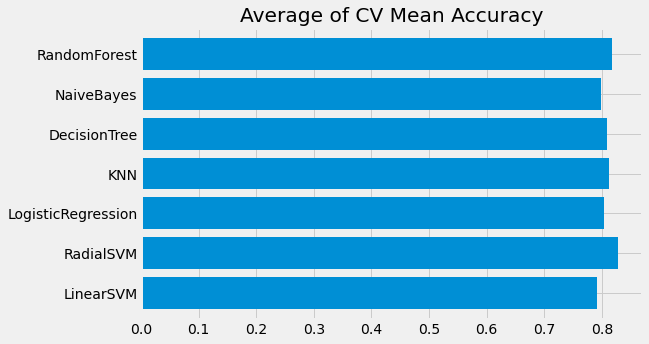

In [111]:
models_df["CV Mean"].plot.barh(width=0.8)
fig=plt.gcf()
plt.title("Average of CV Mean Accuracy")
fig.set_size_inches(8,5)
plt.show()

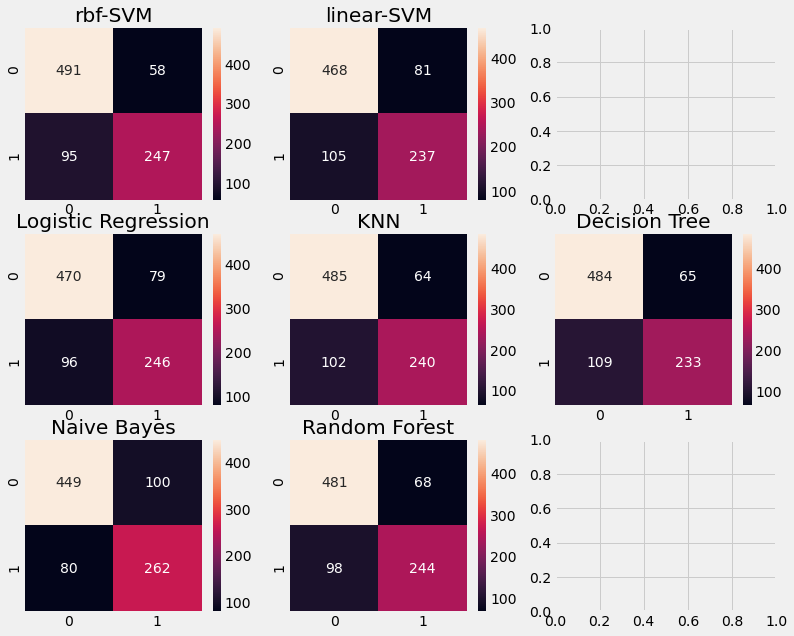

In [112]:
f,ax=plt.subplots(3,3, figsize=(12,10))

y_pred=cross_val_predict(svm.SVC(kernel="rbf"), X,y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,0], annot=True, fmt="2.0f")
ax[0,0].set_title("rbf-SVM")

y_pred=cross_val_predict(svm.SVC(kernel="linear"), X,y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[0,1], annot=True, fmt="2.0f")
ax[0,1].set_title("linear-SVM")

y_pred=cross_val_predict(LogisticRegression(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,0], annot=True, fmt="2.0f")
ax[1,0].set_title("Logistic Regression")

y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9), X,y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,1], annot=True, fmt="2.0f")
ax[1,1].set_title("KNN")

y_pred=cross_val_predict(DecisionTreeClassifier(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[1,2], annot=True, fmt="2.0f")
ax[1,2].set_title("Decision Tree")

y_pred=cross_val_predict(GaussianNB(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[2,0], annot=True, fmt="2.0f")
ax[2,0].set_title("Naive Bayes")

y_pred=cross_val_predict(RandomForestClassifier(), X,y, cv=10)
sns.heatmap(confusion_matrix(y, y_pred), ax=ax[2,1], annot=True, fmt="2.0f")
ax[2,1].set_title("Random Forest")

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

## hyperparameter tuning

### 1. SVM

In [124]:
from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] #range는 integer만 가능ㅠ
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
kernel=["rbf","linear"]

param_grid={"kernel":kernel,
            "C":C,
            "gamma":gamma}

grid_model=GridSearchCV(estimator=svm.SVC(),
                       param_grid=param_grid,
                       verbose=True) #진행상황 print
grid_model.fit(X,y)
print(grid_model.best_score_)
print(grid_model.best_estimator_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.6, gamma=0.1)


[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:   20.0s finished


C=0.6, gamma=0.1

### 2. RF

In [125]:
n_estimators=list(range(100,1000,100))

param_grid={"n_estimators": n_estimators}

grid_model=GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                       param_grid=param_grid,
                       verbose=True) 
grid_model.fit(X,y)
print(grid_model.best_score_)
print(grid_model.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   48.3s finished


0.8193208210407382
RandomForestClassifier(n_estimators=900, random_state=0)


n_estimators=900

### 3. NB

In [126]:
param_grid={'var_smoothing': np.logspace(0,-9, num=100)}

grid_model=GridSearchCV(estimator=GaussianNB(),
                       param_grid=param_grid,
                       verbose=True) 
grid_model.fit(X,y)
print(grid_model.best_score_)
print(grid_model.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7991588726382525
GaussianNB(var_smoothing=0.02848035868435802)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.7s finished


# ↪ confusion matrix에서 NB도 잘 나왔는데 튜닝 안하길래 찾아보니깐 parameter 자체가 두개밖에 없고 애초에 튜닝을 별로 안하는 알고리즘인듯.
https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb

## Ensembling

### 1. Voting Classifier

In [135]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[("KNN", KNeighborsClassifier(n_neighbors=9)), 
                                        ("RBF",svm.SVC(kernel="rbf",C=0.6,gamma=0.1,probability=True)),
                                        ("linearSVM",svm.SVC(kernel="linear",probability=True)),
                                        ("RF",RandomForestClassifier(n_estimators=900,random_state=0)),
                                        ("LR",LogisticRegression(C=0.05)),
                                        ("DT",DecisionTreeClassifier(random_state=0)),
                                        ("NB",GaussianNB(var_smoothing=0.02848035868435802))],
                            voting="soft").fit(train_X, train_y)
                                       
print("Accuracy for ensemble model:", ensemble.score(test_X, test_y))

cross=cross_val_score(ensemble, X,y, cv=10, scoring="accuracy")
print("CV score:",cross.mean())

Accuracy for ensemble model: 0.8283582089552238
CV score: 0.8237952559300874


위에선 KNN n_neighbors=9 해놓고선 왜 여기선 10,,
위에서 나온 best param으로 했음.
- 캐글보다 살짝 더 성능이 좋다,,^^

### 2. Bagging
- variance가 큰 모델에 잘 먹힘 => KNN

In [137]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                       random_state=0,
                       n_estimators=700)
model.fit(train_X, train_y)
pred = model.predict(test_X)

print("Accuracy of bagged KNN:", metrics.accuracy_score(pred,test_y))

cv_score=cross_val_score(model,X,y, cv=10, scoring="accuracy")
print("CV score for bagged KNN:", cv_score.mean())

Accuracy of bagged KNN: 0.835820895522388
CV score for bagged KNN: 0.8171660424469414


In [138]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9),
                       random_state=0,
                       n_estimators=700)
model.fit(train_X, train_y)
pred = model.predict(test_X)

print("Accuracy of bagged KNN:", metrics.accuracy_score(pred,test_y))

cv_score=cross_val_score(model,X,y, cv=10, scoring="accuracy")
print("CV score for bagged KNN:", cv_score.mean())

Accuracy of bagged KNN: 0.8470149253731343
CV score for bagged KNN: 0.8115480649188515


In [139]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=0, n_estimators=100)
model.fit(train_X, train_y)
pred = model.predict(test_X)

print("Accuracy of bagged DecisionTree:", metrics.accuracy_score(pred,test_y))

cv_score=cross_val_score(model,X,y, cv=10, scoring="accuracy")
print("CV score for bagged DecisionTree:", cv_score.mean())

Accuracy of bagged DecisionTree: 0.832089552238806
CV score for bagged DecisionTree: 0.8160174781523096


In [140]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=0, n_estimators=700)
model.fit(train_X, train_y)
pred = model.predict(test_X)

print("Accuracy of bagged DecisionTree:", metrics.accuracy_score(pred,test_y))

cv_score=cross_val_score(model,X,y, cv=10, scoring="accuracy")
print("CV score for bagged DecisionTree:", cv_score.mean())

Accuracy of bagged DecisionTree: 0.832089552238806
CV score for bagged DecisionTree: 0.8137827715355804


KNN n_neighbors=9일때 제일 성능 좋음

### 3. Boosting

In [142]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X,y,cv=10, scoring="accuracy")
print("CV score for adaboost:",result.mean())

CV score for adaboost: 0.8271660424469414


In [143]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad, X,y,cv=10, scoring="accuracy")
print("CV score for gradient boosting:",result.mean())

CV score for gradient boosting: 0.8137827715355804


In [ ]:
import xgboost as xgb

xg=xgb(n_estimators=900, random_state=0, learning_rate=0.1)
result=cross_val_score(xg, X,y,cv=10, scoring="accuracy")
print("CV score for xgboost:",result.mean())

adaboost 정확도가 가장 높음 => tuning

In [151]:
n_estimators=list(range(100,1100,100))
learning_rate=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
param_grid={"n_estimators":n_estimators,
           "learning_rate":learning_rate}
cv=GridSearchCV(estimator=AdaBoostClassifier(),
               param_grid=param_grid,
               verbose=True)
cv.fit(X,y)
print(cv.best_score_)
print(cv.best_estimator_)


Fitting 5 folds for each of 110 candidates, totalling 550 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed: 10.3min finished


0.8271483271608814
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


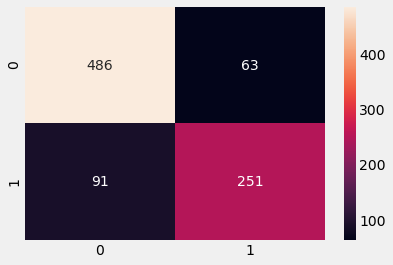

In [152]:
ada=AdaBoostClassifier(n_estimators=300, learning_rate=0.05, random_state=0)
result=cross_val_predict(ada,X,y, cv=10)

sns.heatmap(confusion_matrix(y,result), annot=True, fmt="2.0f")
plt.show()

## feature importance

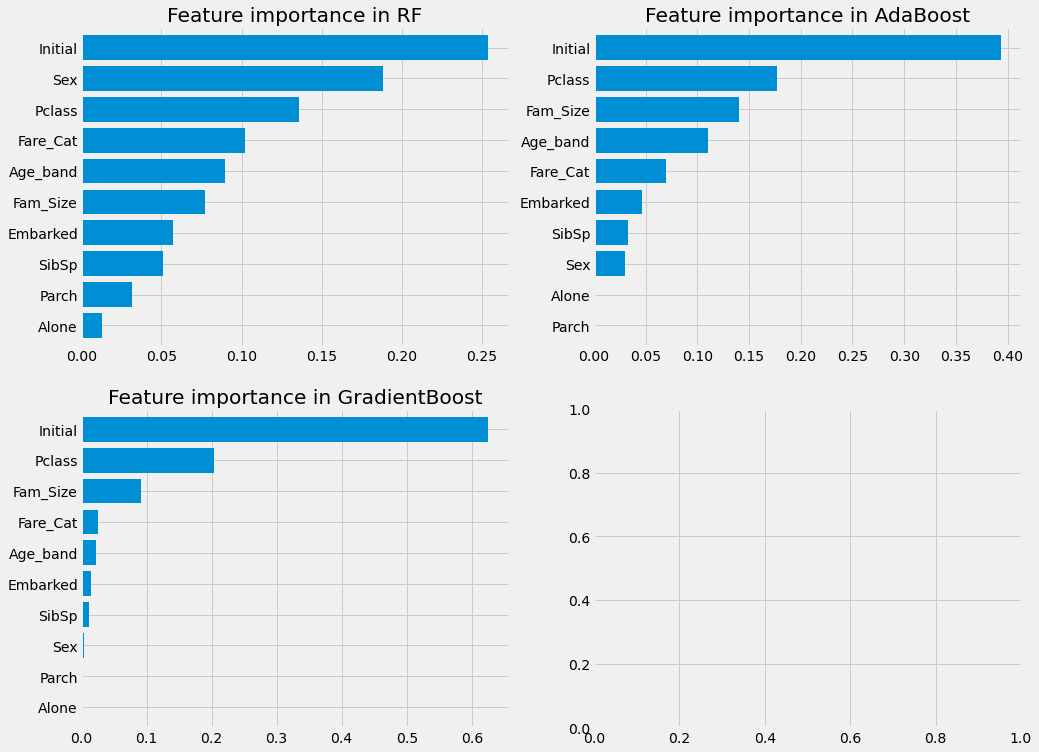

In [154]:
f, ax = plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=900, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title("Feature importance in RF")

model=AdaBoostClassifier(n_estimators=300, learning_rate=0.05, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1])
ax[0,1].set_title("Feature importance in AdaBoost")

model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0])
ax[1,0].set_title("Feature importance in GradientBoost")

plt.show()